In [2]:
import numpy as np
import random

In [3]:
def generate_spiral_data(num_samples, noise, test_ratio):
    def gen_spiral(delta_t, label, n):
        points = []
        for i in range(n):
            r = i / n * 5
            t = 1.75 * i / n * 2 * np.pi + delta_t
            x = r * np.sin(t) + np.random.uniform(-1, 1) * noise
            y = r * np.cos(t) + np.random.uniform(-1, 1) * noise
            points.append((x, y, label))
        return points

    n = num_samples // 2
    points = gen_spiral(0, 1, n) + gen_spiral(np.pi, -1, n)

    random.shuffle(points)

    test_size = int(len(points) * test_ratio)
    test_data = points[:test_size]
    train_data = points[test_size:]

    return train_data, test_data

In [4]:
def generate_XOR_data(num_samples, noise, test_ratio):
    def get_XOR_label(p):
        return 1 if p[0] * p[1] >= 0 else -1

    def rand_uniform(min_val, max_val):
        return np.random.uniform(min_val, max_val)
    
    points = []
    for _ in range(num_samples):
        x = rand_uniform(-5, 5)
        padding = 0.3
        x += padding if x > 0 else -padding
        y = rand_uniform(-5, 5)
        y += padding if y > 0 else -padding
        noise_x = rand_uniform(-5, 5) * noise
        noise_y = rand_uniform(-5, 5) * noise
        label = get_XOR_label((x + noise_x, y + noise_y))
        points.append((x, y, label))
    
    # Shuffle points
    random.shuffle(points)
    
    # Split points into train and test sets
    test_size = int(len(points) * test_ratio)
    test_data = points[:test_size]
    train_data = points[test_size:]

    return train_data, test_data

In [5]:
# Usage example
num_samples = 1000
noise = 0.5
test_ratio = 0.2

train_data, test_data = generate_spiral_data(num_samples, noise, test_ratio)
# train_data, test_data = generate_XOR_data(num_samples, noise, test_ratio)


print(f'Train Data: {len(train_data)} points')
print(f'Test Data: {len(test_data)} points')

Train Data: 800 points
Test Data: 200 points


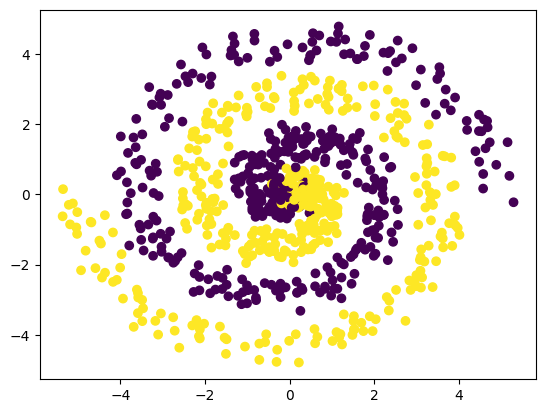

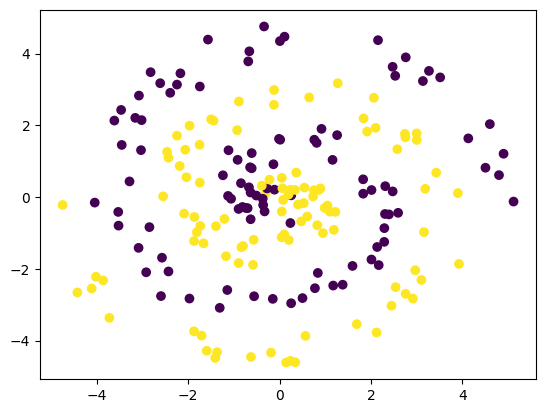

In [6]:
#plot the data

import matplotlib.pyplot as plt

def plot_data(data):
    x, y, labels = zip(*data)
    plt.scatter(x, y, c=labels)
    plt.show()

plot_data(train_data)
plot_data(test_data)

In [7]:
#save the data to a file
import csv

def save_data(data, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

save_data(train_data, 'train_data.csv')
save_data(test_data, 'test_data.csv')